In [5]:
from  skimage.io import imread, imshow
import random
import os
import pywt
import re
import pywt.data
from skimage.transform import resize  # Correct import statement
import matplotlib.pyplot as plt
import numpy as np
# Import train_test_split function
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score
import time


In [6]:
def Get_Feacture(picture, cortes, target_size=(64, 768)):
    # Resize the image to a common size (e.g., 64x64)
    picture = resize_image(picture, target_size)
    
    LL = picture
    for i in range(cortes):
        LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')
    return LL.flatten()

# Function to resize an image using skimage
def resize_image(image, target_size):
    return resize(image, target_size, mode='constant', anti_aliasing=True)


numeros_de_especie = []
numeros_de_imagen = []

def process_images(path):
    files_names = os.listdir(path)
    vector_X = []
    vector_y = []    

    for filename in files_names:
        match = re.match(r'(\d{3})(\d{4})', filename)
        if match:
            esp  = match.group(1)
            num = match.group(2)
            especie = int(esp)
            imagen = int(num)
            image = imread(os.path.join(path, filename))
            feature = Get_Feacture(image, 2)
            vector_X.append(feature)
            vector_y.append(especie)
            
            numeros_de_especie.append(especie)
            numeros_de_imagen.append(imagen)
    return np.array(vector_X), np.array(vector_y)



path = './images'
vector_X,vector_y = process_images(path)

print("Números de especie:", numeros_de_especie)
print("Números de imagen:", numeros_de_imagen)

print(len(vector_y))
print(len(vector_X))


Números de especie: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5

d:\Proyectos_2023\Machine_Learning\Proyecto_1\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Modelo: Regresión Logística
Exactitud: 0.352
Precisión promedio: 0.3812210012210012
Recuperación promedio: 0.352
Puntaje F1 promedio: 0.35081696607681034
----------------------------------------


d:\Proyectos_2023\Machine_Learning\Proyecto_1\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo: SVM
Exactitud: 0.328
Precisión promedio: 0.34994285714285706
Recuperación promedio: 0.328
Puntaje F1 promedio: 0.3147748345222029
----------------------------------------


d:\Proyectos_2023\Machine_Learning\Proyecto_1\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo: KNN
Exactitud: 0.24
Precisión promedio: 0.3056198198198198
Recuperación promedio: 0.24
Puntaje F1 promedio: 0.22972830259472257
----------------------------------------
Modelo: Árbol de Decisión
Exactitud: 0.304
Precisión promedio: 0.34806994835230126
Recuperación promedio: 0.304
Puntaje F1 promedio: 0.31403627351965396
----------------------------------------


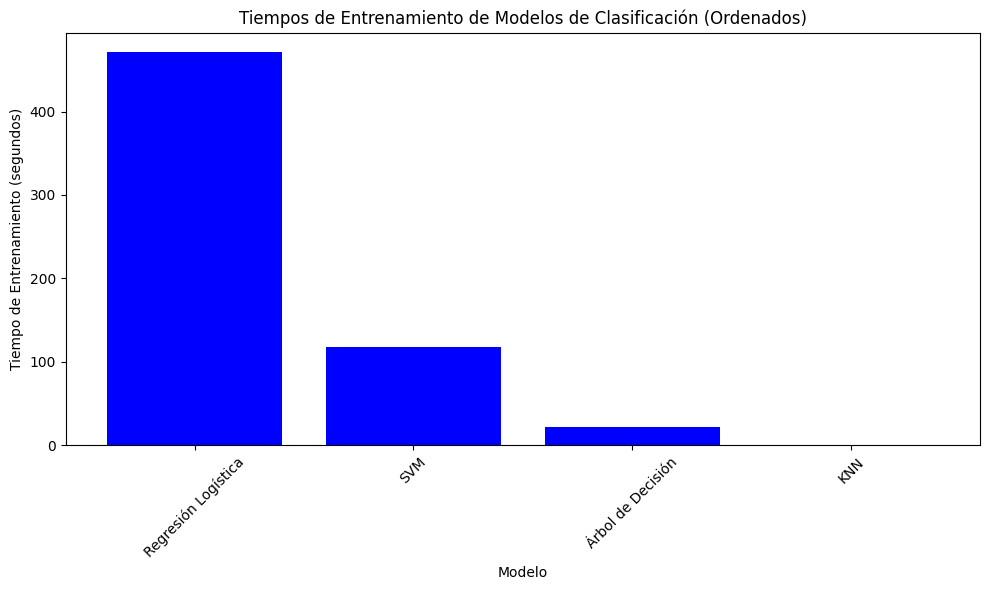

In [7]:
################################################
tiempo_entrenamiento = {}  # Diccionario para almacenar los tiempos de entrenamiento
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

tiemp= {}
# Aleatorización inicial de los datos originales
random.seed(42)  # Establece una semilla para la aleatorización (ajusta según sea necesario)
shuffled_indices = list(range(len(vector_X)))
random.shuffle(shuffled_indices)

# Aplicar la aleatorización a vector_X y vector_y
vector_X = vector_X[shuffled_indices]
vector_y = vector_y[shuffled_indices]

# División de datos en entrenamiento, validación y prueba
X_train, X_rest, y_train, y_rest = train_test_split(vector_X, vector_y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, solver='sag'),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Árbol de Decisión": DecisionTreeClassifier()
}

for model_name, model in models.items():
    inicio = time.time()
    model.fit(X_train, y_train)
    final = time.time()
    tiempo_entrenamiento[model_name] = final - inicio  # Almacenar el tiempo de entrenamiento
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Modelo: {model_name}")
    print(f"Exactitud: {accuracy}")
    print(f"Precisión promedio: {precision}")
    print(f"Recuperación promedio: {recall}")
    print(f"Puntaje F1 promedio: {f1}")
    print("----------------------------------------")

# Crear gráfico de tiempos de entrenamiento ordenados
sorted_tiempo_entrenamiento = dict(sorted(tiempo_entrenamiento.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(sorted_tiempo_entrenamiento.keys(), sorted_tiempo_entrenamiento.values(), color='blue')
plt.xlabel('Modelo')
plt.ylabel('Tiempo de Entrenamiento (segundos)')
plt.title('Tiempos de Entrenamiento de Modelos de Clasificación (Ordenados)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:


data = {}

# Realizar K-fold cross-validation para cada modelo
num_folds = 5  # Puedes ajustar el número de pliegues K según tus necesidades

for model_name, model in models.items():
    # Aplicar K-fold cross-validation
    scores = cross_val_score(model, vector_X, vector_y, cv=num_folds, scoring='accuracy')
    data[model_name] = scores.mean()
    
    # Imprimir los resultados de la validación cruzada para cada modelo
    print("Modelo:", model_name)
    print("Precisión media:", scores.mean())
    print("Desviación estándar de la precisión:", scores.std())
    print("--------------------------------------------------")


# Ordenar el diccionario por valores en orden decreciente
sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

# Extraer las etiquetas y los valores ordenados
labels, values = zip(*sorted_data)
colors = ['blue', 'green', 'red', 'purple']

# Crear la gráfica de barras decreciente
plt.bar(labels, values, color=colors)

# Agregar etiquetas a los ejes
plt.xlabel('Modelo')
plt.ylabel('Precisión Media')
plt.title('Precisión Media en Validación Cruzada K-fold')

# Mostrar la gráfica
plt.show()

